<a href="https://colab.research.google.com/github/hungpx2008/AIO-Exercise/blob/Feature%2FExercise-activate-funtion/MODULE_4_%5BLinear_Regression%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    X = np.column_stack((tv_data, radio_data, newspaper_data))
    y = sales_data

    return X, y


In [31]:
X,y = prepare_data ( '/content/sample_data/advertising.csv')
list = [ sum ( X [0][:5]) , sum ( X [1][:5]) , sum ( X [2][:5]) , sum ( y [:5]) ]
print ( list )


[624.1, 175.10000000000002, 300.5, 78.9]


In [ ]:
# Bài 2

In [3]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b


In [4]:
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result


In [5]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[i][0]
            x2 = X_data[i][1]
            x3 = X_data[i][2]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            dl_dw1 = 2 * (y_hat - y) * x1
            dl_dw2 = 2 * (y_hat - y) * x2
            dl_dw3 = 2 * (y_hat - y) * x3
            dl_db = 2 * (y_hat - y)

            w1 = w1 - lr * dl_dw1
            w2 = w2 - lr * dl_dw2
            w3 = w3 - lr * dl_dw3
            b = b - lr * dl_db

    return w1, w2, w3, b, losses


In [6]:
y = predict ( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print ( y )

1.0


In [7]:

def compute_loss(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss
l = compute_loss ( y_hat =1 , y =0.5)
print ( l )

0.25


In [8]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2 * (y_hat - y) * xi
    return dl_dwi


In [9]:
def compute_gradient_b(y, y_hat):
    dl_db = 2 * (y_hat - y)
    return dl_db


In [10]:
g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

-1.0


In [11]:
g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-3.0


In [14]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr * dl_dwi
    return wi
def update_weight_b(b, dl_db, lr):
    b = b - lr * dl_db
    return b

after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [16]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr=1e-5)
print ( after_b )
print ( after_wi )

0.50001
1.000005


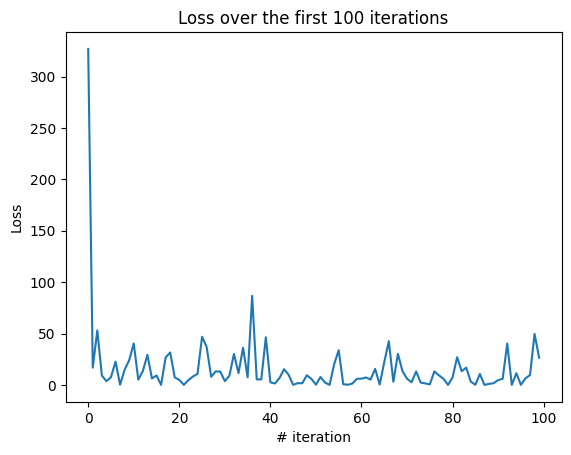

In [42]:
w1, w2, w3, b, losses = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)

plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.title("Loss over the first 100 iterations")
plt.show()


In [41]:
X, y = prepare_data('/content/sample_data/advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression(X,y)
print(w1, w2, w3)


0.07405984066396477 0.15917360263437663 0.017561197559948935


In [45]:
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data ( '/content/sample_data/advertising.csv' )
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

predicted sales is 8.176413319549823


In [47]:
def compute_loss_mae(y_hat, y):
    return abs(y_hat - y)

l = compute_loss_mae ( y_hat =1 , y =0.5)
print ( l )

0.5


In [ ]:
# Bài tập 3

In [48]:
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()

    N = len(y_data)  # Number of samples

    # Training loop
    for epoch in range(epoch_max):
        loss_total = 0.0  # Tổng loss cho tất cả N samples
        dw1_total = 0.0  # Tổng gradient w1
        dw2_total = 0.0  # Tổng gradient w2
        dw3_total = 0.0  # Tổng gradient w3
        db_total = 0.0   # Tổng gradient bias

        for i in range(N):
            # Get a sample from the dataset
            x1 = X_data[i][0]
            x2 = X_data[i][1]
            x3 = X_data[i][2]
            y = y_data[i]

            # Compute predicted output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss (Mean Squared Error)
            loss = compute_loss(y_hat, y)

            # Accumulate loss
            loss_total += loss

            # Compute gradients for each weight and bias
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (After processing N samples) - Update parameters
        w1 -= lr * (dw1_total / N)  # Trung bình gradient cho w1
        w2 -= lr * (dw2_total / N)  # Trung bình gradient cho w2
        w3 -= lr * (dw3_total / N)  # Trung bình gradient cho w3
        b -= lr * (db_total / N)    # Trung bình gradient cho bias

        # Logging: lưu lại trung bình loss cho batch
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses


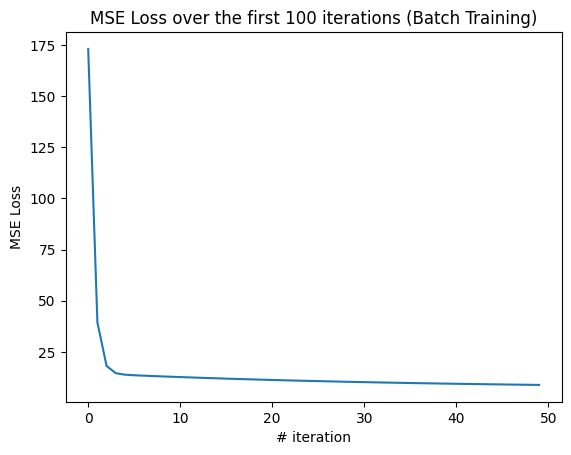

In [49]:
X, y = prepare_data('/content/sample_data/advertising.csv')  # Đọc dữ liệu từ file
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=50, lr=1e-5)

# Vẽ đồ thị loss cho 100 lần cập nhật đầu tiên
plt.plot(losses[:100])
plt.xlabel("# iteration")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over the first 100 iterations (Batch Training)")
plt.show()


In [50]:
def implement_linear_regression_nsamples_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Initialize parameters
    w1, w2, w3, b = initialize_params()

    N = len(y_data)  # Number of samples

    # Training loop
    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Get a sample from the dataset
            x1 = X_data[i][0]
            x2 = X_data[i][1]
            x3 = X_data[i][2]
            y = y_data[i]

            # Compute predicted output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss using MAE
            loss = compute_loss_mae(y_hat, y)
            loss_total += loss

            # Compute gradients for each weight and bias
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Accumulate gradients
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # (After processing N samples) - Update parameters
        w1 -= lr * (dw1_total / N)
        w2 -= lr * (dw2_total / N)
        w3 -= lr * (dw3_total / N)
        b -= lr * (db_total / N)

        # Logging
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses


In [53]:
X , y = prepare_data ( '/content/sample_data/advertising.csv')
# using MSE loss
( w1 , w2 , w3 ,b , losses ) = implement_linear_regression_nsamples (X , y , epoch_max = 1000)
lr = 1e-5

print (w1 , w2 , w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

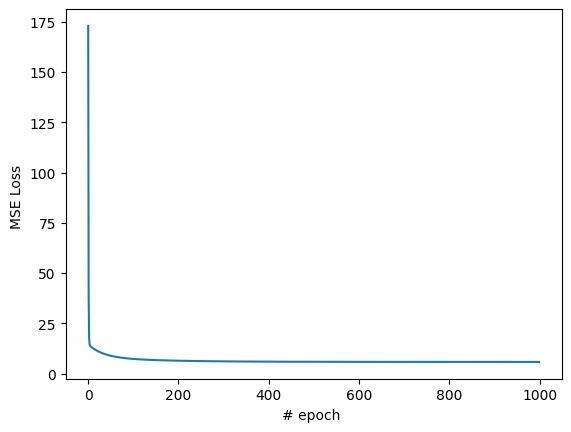

In [55]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)
print(losses)
plt . plot ( losses )
plt . xlabel ("# epoch ")
plt . ylabel ("MSE Loss ")
plt . show ()

In [ ]:
#bài Tập 4

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


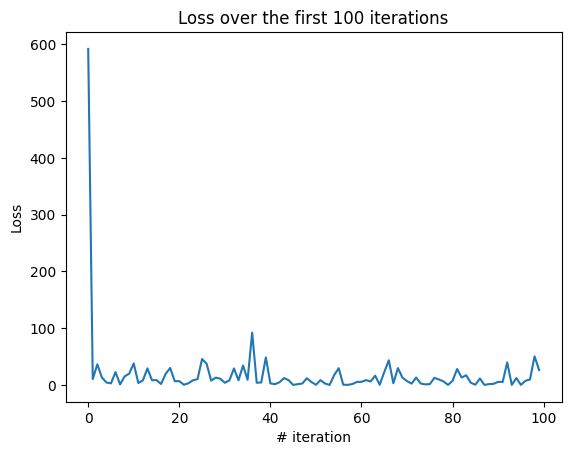

In [56]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Chuẩn bị dữ liệu từ file CSV
def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

    # Lấy các cột TV, Radio, Newspaper
    tv_data = [row[0] for row in data]
    radio_data = [row[1] for row in data]
    newspaper_data = [row[2] for row in data]
    sales_data = [row[3] for row in data]

    # Tạo danh sách features cho input
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y

# Khởi tạo trọng số ban đầu
def initialize_params():
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]

# Dự đoán kết quả y_hat = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
    result = sum([x * w for x, w in zip(X_features, weights)])
    return result

# Tính toán loss theo Mean Squared Error (MSE)
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

# Tính đạo hàm của hàm mất mát theo trọng số
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [2 * (y_hat - y) * x for x in X_features]
    return dl_dweights

# Cập nhật trọng số dựa trên gradient và learning rate
def update_weight(weights, dl_dweights, lr):
    weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return weights

# Huấn luyện mô hình hồi quy tuyến tính
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()  # Khởi tạo trọng số
    N = len(y_output)  # Số lượng mẫu

    for epoch in range(epoch_max):
        print("Epoch", epoch)
        for i in range(N):
            # Lấy một sample - hàng thứ i
            features_i = X_feature[i]
            y = y_output[i]

            # Tính giá trị dự đoán
            y_hat = predict(features_i, weights)

            # Tính toán loss
            loss = compute_loss(y_hat, y)

            # Tính gradient
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Cập nhật trọng số
            weights = update_weight(weights, dl_dweights, lr)

            # Lưu lại loss
            losses.append(loss)

    return weights, losses

# Chuẩn bị dữ liệu
X, y = prepare_data('/content/sample_data/advertising.csv')

# Thực hiện huấn luyện
W, L = implement_linear_regression(X, y)

# Vẽ đồ thị loss cho 100 lần lặp đầu tiên
plt.plot(L[:100])
plt.xlabel("# iteration")
plt.ylabel("Loss")
plt.title("Loss over the first 100 iterations")
plt.show()


In [58]:
X , y = prepare_data ( '/content/sample_data/advertising.csv')
W , L = implement_linear_regression (X , y , epoch_max =50 , lr =1e-5)
# Print loss value at iteration 9999
print ( L [9999])

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
31.339223408109948
